In [1]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [2]:
r_c = 14
r_r = 16

psi_complex = rand(ComplexF32, (2 for _=1:r_c)...)
psi_complex /= sqrt(abs(dot(psi_complex, psi_complex)))

psi_real = rand(Float64, (2 for _=1:r_r)...)
psi_real /= norm(psi_real);

In [3]:
function mps_and_contract(psi, bond_dim)
    A_mps = contract_mps(mps(psi, bond_dim))
    return abs(dot(A_mps, psi))
end

mps_and_contract (generic function with 1 method)

Float32[0.86707276, 0.8687422, 0.8710826, 0.8736664, 0.8775293, 0.88167363, 0.8909576, 0.93250746, 0.9866124, 0.99999666, 0.99999666, 0.99999666, 0.99999666]

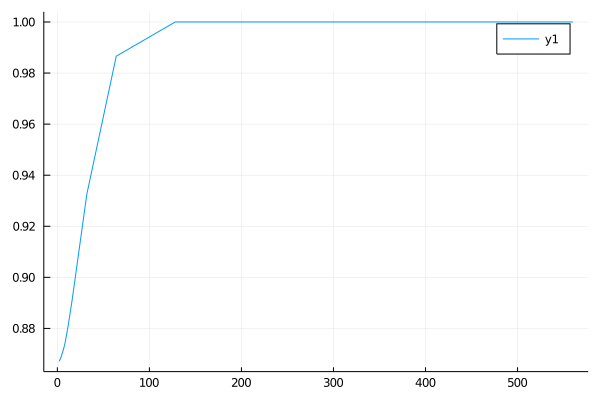

In [4]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims, complex_fidelities) # ? 

[0.8658757079022037, 0.8662216840760539, 0.866880435670179, 0.8679793878091382, 0.868899665685801, 0.8704206433653645, 0.8736276416058343, 0.891444932669878, 0.9323610530260217, 0.9863724314566558, 1.0000000000000058, 1.0000000000000058, 1.0000000000000058]

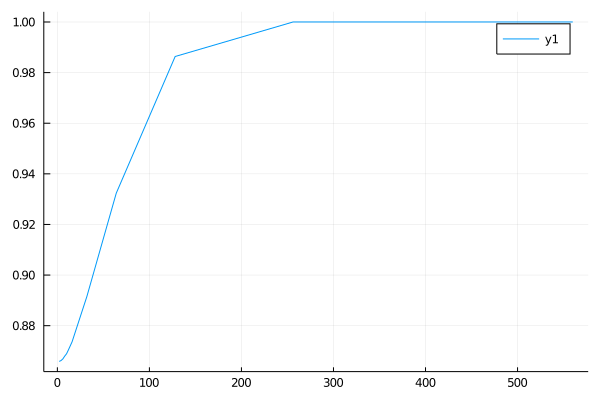

In [5]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims, real_fidelities)